In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import xgboost as xgb



In [2]:
data = pd.read_csv("Dataset_A_loan.csv")  
data.head(50)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,NaN,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [5]:
data.shape

(45000, 14)

In [7]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.275000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.018223e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,7.331158e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.726725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.705500e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.582125e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,5.556399e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [11]:
#MISSING VALUE

print ("Missing Values : ")
print (data.isnull().sum())
print ("------------------------------")
print ("Duplicate Values : ", str(data.duplicated().sum()))

Missing Values : 
person_age                           0
person_gender                        0
person_education                     0
person_income                     2250
person_emp_exp                       0
person_home_ownership                0
loan_amnt                            0
loan_intent                          0
loan_int_rate                        0
loan_percent_income                  0
cb_person_cred_hist_length           0
credit_score                         0
previous_loan_defaults_on_file       0
loan_status                          0
dtype: int64
------------------------------
Duplicate Values :  0


In [13]:
nan_rows = data[data.isna().any(axis=1)]

nan_rows.head(20)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
5,21.0,female,High School,NaN,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
27,23.0,male,High School,NaN,0,OWN,1400.0,PERSONAL,9.32,0.10,3.0,607,No,0
105,22.0,male,High School,NaN,1,MORTGAGE,2000.0,PERSONAL,5.42,0.12,4.0,614,No,1
176,24.0,male,High School,NaN,0,MORTGAGE,24000.0,VENTURE,7.49,0.10,4.0,656,Yes,0
207,23.0,female,Bachelor,NaN,0,RENT,25000.0,MEDICAL,10.36,0.28,3.0,653,No,1
234,24.0,female,Bachelor,NaN,0,RENT,22000.0,HOMEIMPROVEMENT,14.46,0.10,4.0,655,Yes,0
299,25.0,male,High School,NaN,3,MORTGAGE,8800.0,DEBTCONSOLIDATION,14.27,0.04,3.0,616,Yes,0
313,26.0,female,Associate,NaN,3,RENT,13000.0,VENTURE,12.42,0.06,3.0,654,No,0
325,21.0,female,High School,NaN,2,OWN,1000.0,VENTURE,7.29,0.05,4.0,681,Yes,0
327,26.0,male,Master,NaN,0,RENT,25000.0,PERSONAL,10.75,0.16,3.0,677,Yes,0


In [15]:
cat_col = []
num_col = []

for i in data.columns:
    dtype_str = str(data[i].dtype)
    if 'int' in dtype_str or 'float' in dtype_str:
        num_col.append(i)
    else:
        cat_col.append(i)

print("Numerik:", num_col)
print("Kategorikal:", cat_col)


Numerik: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']
Kategorikal: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']


In [17]:

for col in num_col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    bawah = Q1 - 1.5 * IQR
    atas = Q3 + 1.5 * IQR
    outliers = data[(data[col] < bawah) | (data[col] > atas)]
    if not outliers.empty:
        print(f"Outlier terdeteksi di kolom '{col}': total {len(outliers)}")
        print(outliers[[col]])
        print()


Outlier terdeteksi di kolom 'person_age': total 2188
       person_age
81          144.0
183         144.0
575         123.0
747         123.0
29120        40.0
...           ...
44916        42.0
44923        47.0
44947        42.0
44972        43.0
44977        43.0

[2188 rows x 1 columns]

Outlier terdeteksi di kolom 'person_income': total 2112
       person_income
15          600891.0
20          195718.0
33          368115.0
34          361076.0
42          361293.0
...              ...
44786       256529.0
44831       192090.0
44836       293525.0
44922       726416.0
44947       705960.0

[2112 rows x 1 columns]

Outlier terdeteksi di kolom 'person_emp_exp': total 1724
       person_emp_exp
81                125
183               121
575               101
747               100
29120              19
...               ...
44916              21
44923              24
44947              21
44972              20
44977              21

[1724 rows x 1 columns]

Outlier terdeteksi di ko

In [19]:

age = data[data['person_age'] > 90]
print(age[['person_age']])


       person_age
81          144.0
183         144.0
575         123.0
747         123.0
32297       144.0
32416        94.0
37930       116.0
38113       109.0


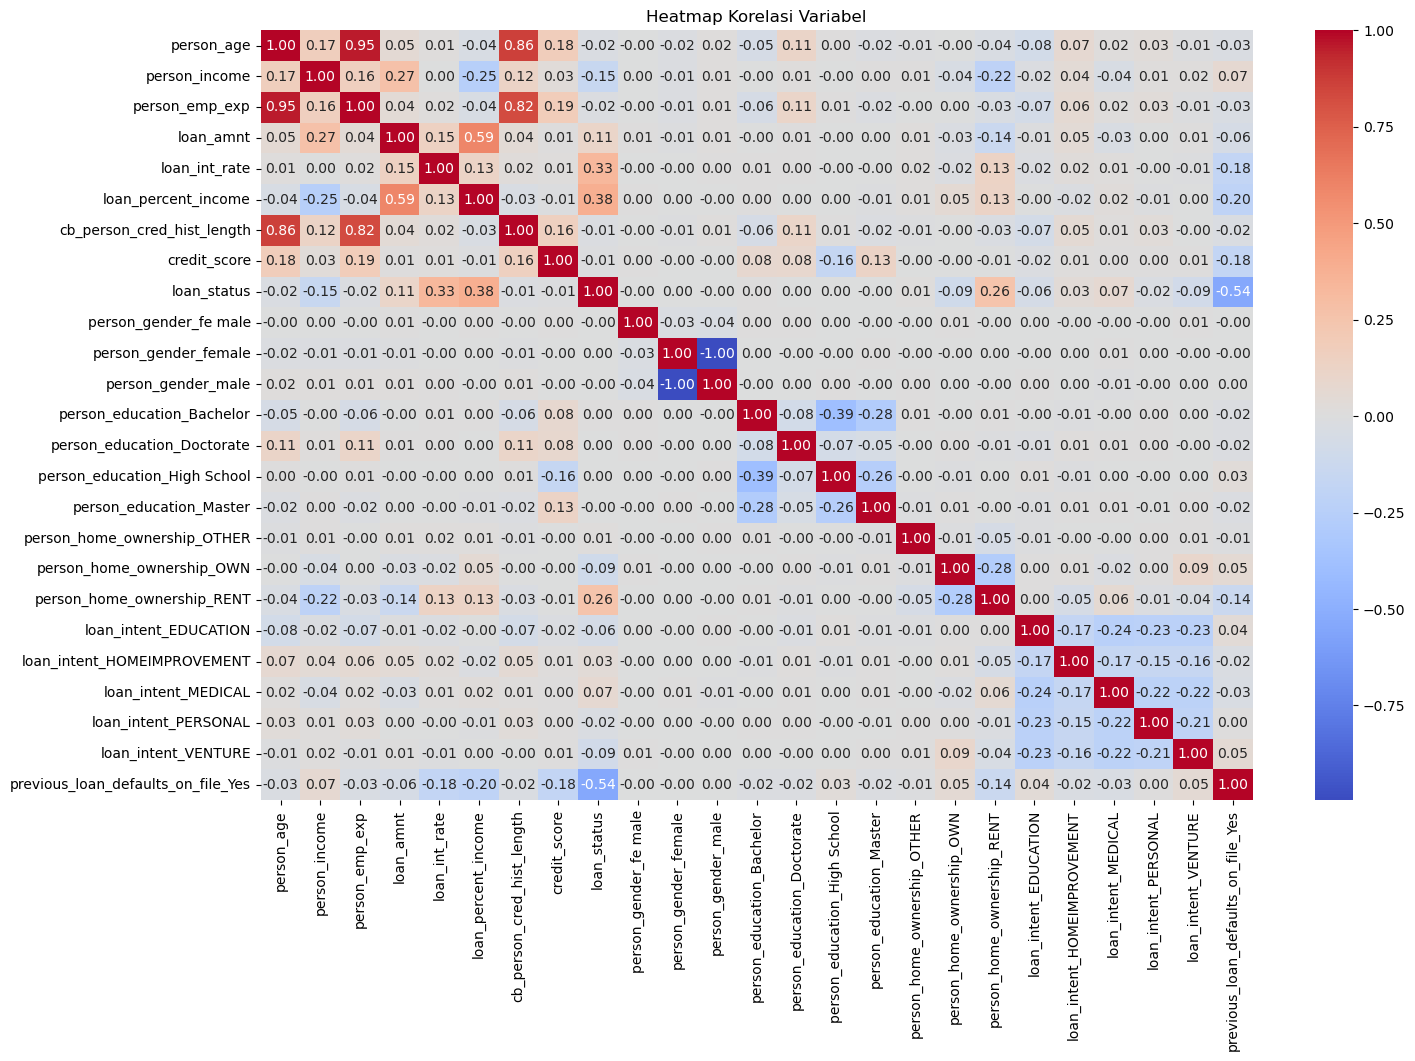

In [21]:

column_drop = []  
data_corr = data.drop(columns=column_drop)

data_corr = pd.get_dummies(data_corr, drop_first=True)
plt.figure(figsize=(16, 10)) 
sns.heatmap(data_corr.corr(), annot=True, fmt='.2f', cmap='coolwarm') 
plt.title('Heatmap Korelasi Variabel')
plt.show()


In [23]:
for col in num_col:
    negatif = data[data[col] < 0]
    if not negatif.empty:
        print(f"Negative Value: '{col}': total {len(negatif)}")
        print(negatif[[col]])
        print()
#no negative values

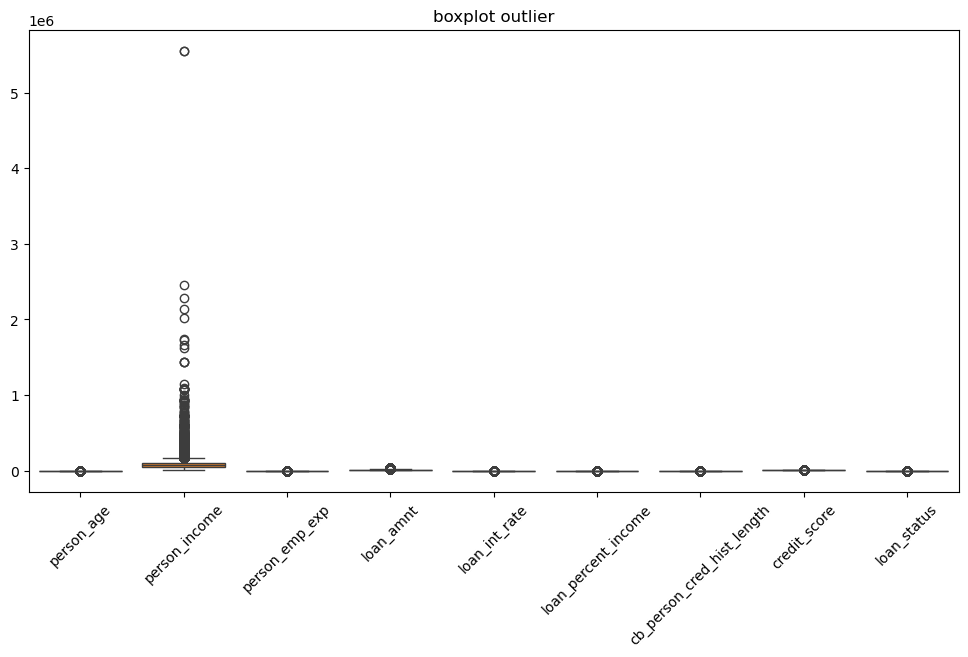

In [25]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=data[num_col])
plt.xticks(rotation=45)
plt.title("boxplot outlier")
plt.show()



In [27]:
for col in cat_col:
    print(f"Kolom {col}")
    print(data[col].unique())
    print()


Kolom person_gender
['female' 'male' 'Male' 'fe male']

Kolom person_education
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']

Kolom person_home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER']

Kolom loan_intent
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

Kolom previous_loan_defaults_on_file
['No' 'Yes']



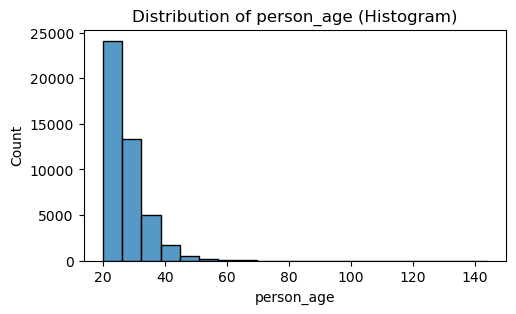

Skewness person_age: 2.5481540050382425
Kurtosis person_age: 18.64944898184852
-----------------------------------------


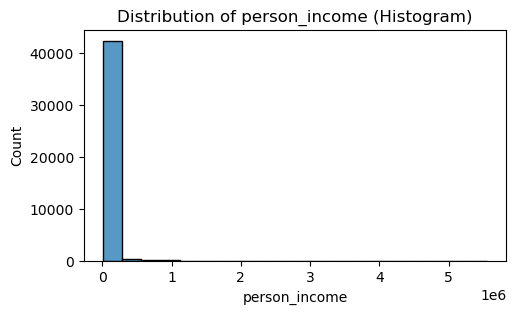

Skewness person_income: 25.60673912825341
Kurtosis person_income: 1569.8526113553646
-----------------------------------------


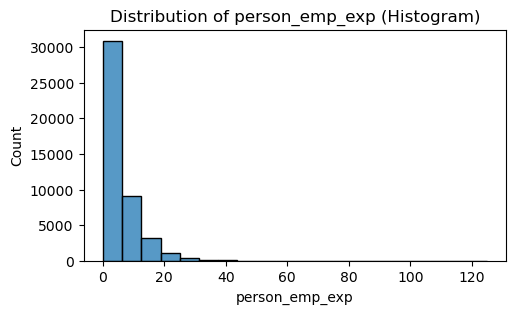

Skewness person_emp_exp: 2.5949173726318255
Kurtosis person_emp_exp: 19.1683237539473
-----------------------------------------


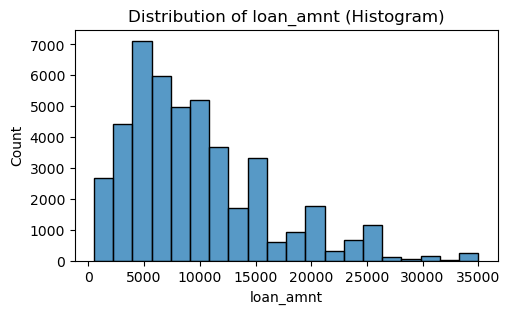

Skewness loan_amnt: 1.1797312856279223
Kurtosis loan_amnt: 1.3512152308228198
-----------------------------------------


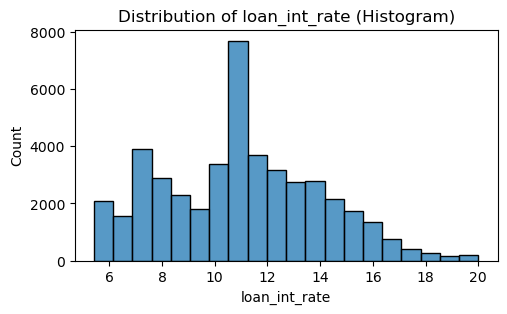

Skewness loan_int_rate: 0.21378407238735642
Kurtosis loan_int_rate: -0.42033530822379506
-----------------------------------------


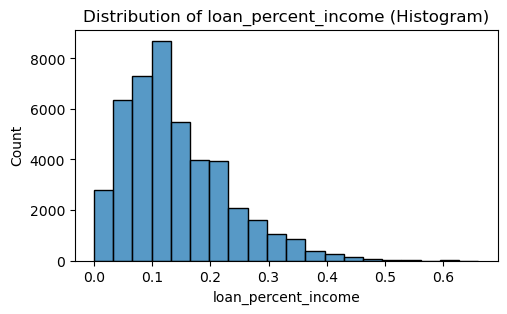

Skewness loan_percent_income: 1.034512151182724
Kurtosis loan_percent_income: 1.0824162412535965
-----------------------------------------


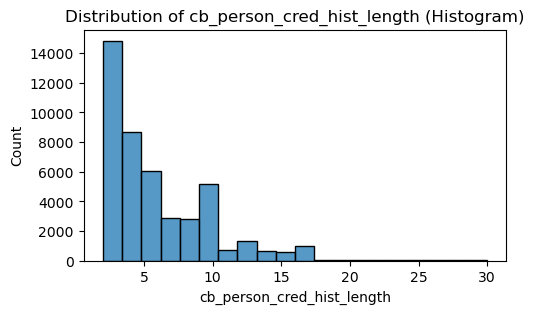

Skewness cb_person_cred_hist_length: 1.6317199538415355
Kurtosis cb_person_cred_hist_length: 3.725944524091197
-----------------------------------------


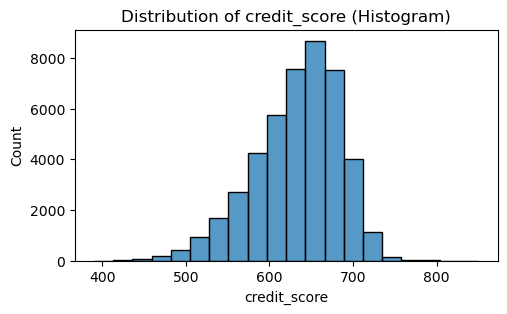

Skewness credit_score: -0.6102608322577946
Kurtosis credit_score: 0.20302185635702363
-----------------------------------------


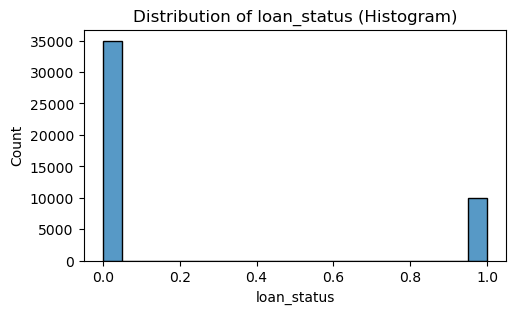

Skewness loan_status: 1.3363507549997484
Kurtosis loan_status: -0.21417618052832044
-----------------------------------------


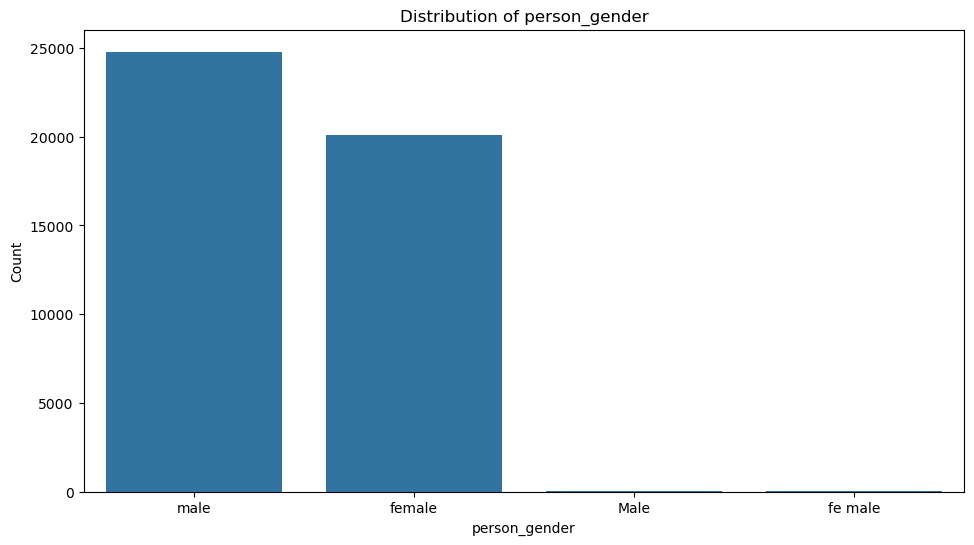

Distribution of person_gender:
person_gender
male       55.108889
female     44.691111
Male        0.100000
fe male     0.100000
Name: proportion, dtype: float64
--------------------------------------------


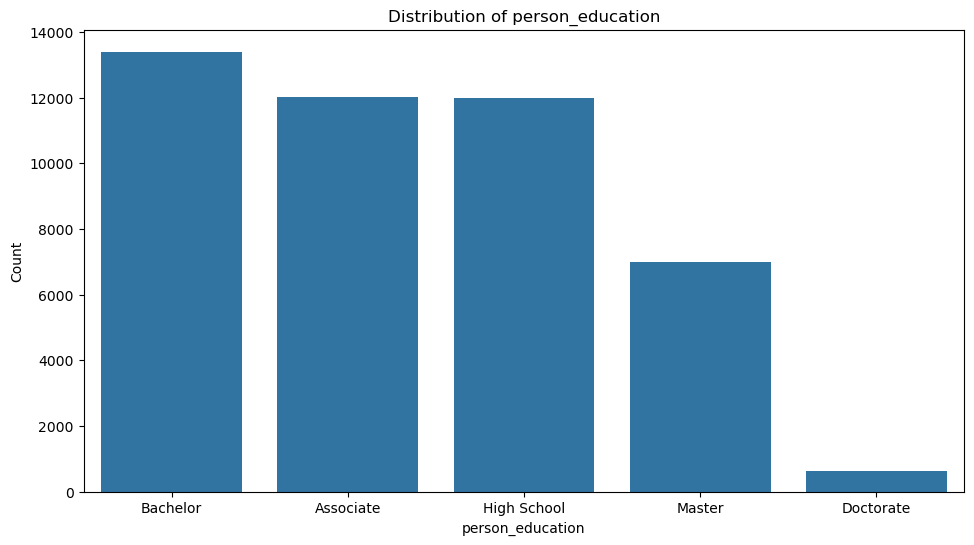

Distribution of person_education:
person_education
Bachelor       29.775556
Associate      26.728889
High School    26.604444
Master         15.511111
Doctorate       1.380000
Name: proportion, dtype: float64
--------------------------------------------


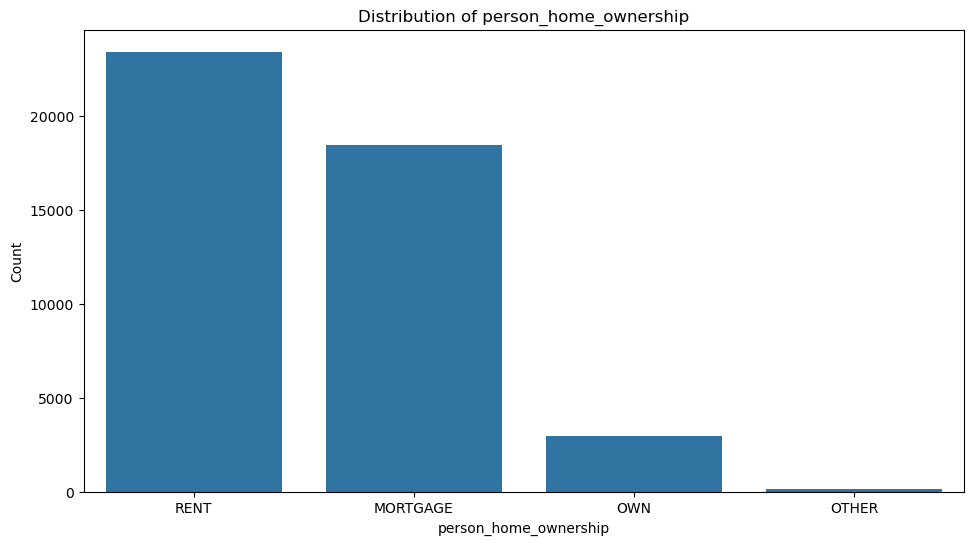

Distribution of person_home_ownership:
person_home_ownership
RENT        52.095556
MORTGAGE    41.086667
OWN          6.557778
OTHER        0.260000
Name: proportion, dtype: float64
--------------------------------------------


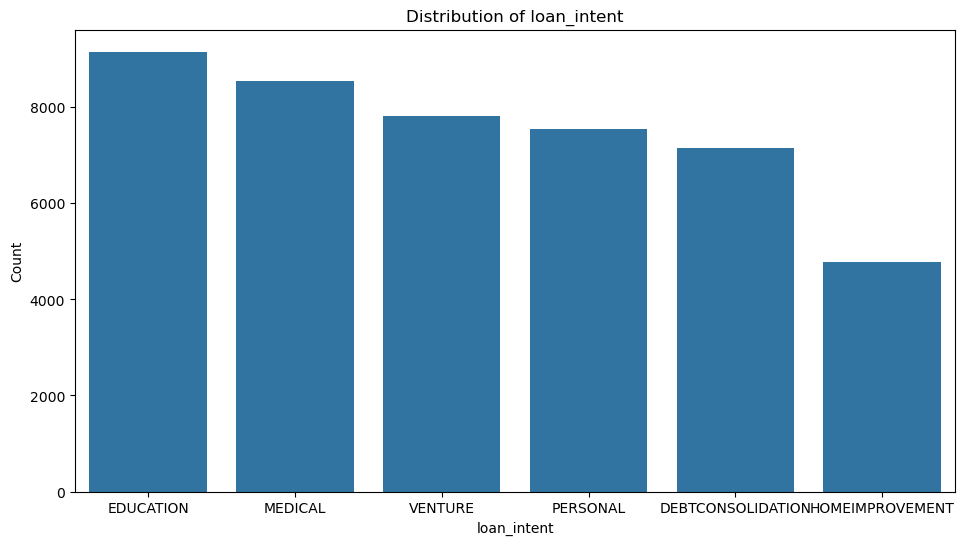

Distribution of loan_intent:
loan_intent
EDUCATION            20.340000
MEDICAL              18.995556
VENTURE              17.375556
PERSONAL             16.782222
DEBTCONSOLIDATION    15.877778
HOMEIMPROVEMENT      10.628889
Name: proportion, dtype: float64
--------------------------------------------


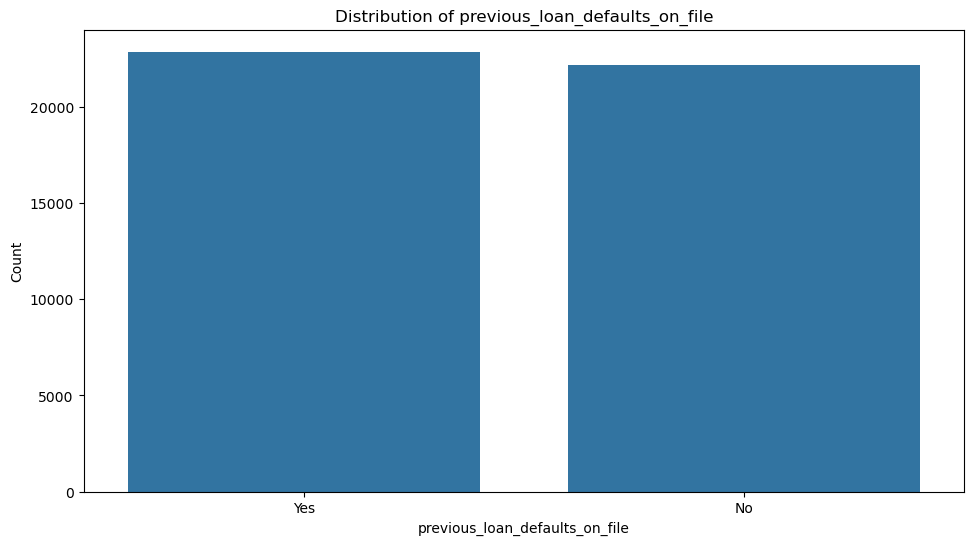

Distribution of previous_loan_defaults_on_file:
previous_loan_defaults_on_file
Yes    50.795556
No     49.204444
Name: proportion, dtype: float64
--------------------------------------------


In [29]:

data[num_col] = data[num_col].apply(pd.to_numeric, errors='coerce')

def check_distribution(data, columns):
    for col in columns:
        plt.figure(figsize=(12, 3))
        
        plt.subplot(1, 2, 1)
        sns.histplot(data[col], kde=False, bins=20)
        plt.title(f'Distribution of {col} (Histogram)')
        plt.show()
        print(f'Skewness {col}:', data[col].skew())
        print(f'Kurtosis {col}:', data[col].kurt())
        print('-----------------------------------------')

check_distribution(data, num_col)



def check_categorical_distribution(data, columns):
    for col in columns:
        plt.figure(figsize=(25, 6))
        
        # Plot Countplot untuk kolom kategorikal
        plt.subplot(1, 2, 1)
        sns.countplot(x=data[col], order=data[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()
        
        print(f"Distribution of {col}:")
        print(data[col].value_counts(normalize=True) * 100)
        print('--------------------------------------------')

check_categorical_distribution(data, cat_col)


LIST ANOMALI :-
person_age ada nilai lebih dari90
-
person_income banyak nilai missing val : 1. imputasi pake median berdasarkan educati-on
person_income banyak nilai ekstr 
1. log transe-diksi
person_gender ada salah ketik class nya
1. kelas 'Male' harus digabungkan ke 'male'
2. kelas 'fe male' harus digabungkan ke 'female'


## PREPROCESSING

In [31]:
X = data.drop(columns=['loan_status'])
y = data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [33]:
# drop age > 90
X_train = X_train[X_train['person_age'] <= 90]
y_train = y_train[X_train.index]  # Menjaga indeks yang konsisten

X_test = X_test[X_test['person_age'] <= 90]
y_test = y_test[X_test.index]  # Menjaga indeks yang konsisten


In [35]:
#missing value
income_medians = X_train.groupby('person_education')['person_income'].median()
def fill_income(row):
    if pd.isna(row['person_income']):
        return income_medians.get(row['person_education'], X_train['person_income'].median())
    else:
        return row['person_income']


X_train['person_income'] = X_train.apply(fill_income, axis=1)
X_test['person_income'] = X_test.apply(fill_income, axis=1)

#maka kamu menggunakan informasi dari X_test itu sendiri 
# (yang seharusnya dianggap "tidak terlihat" saat training) untuk mengisi missing value. Itu termasuk data leakage, walaupun tidak kelihatan di permukaan.




In [36]:
# Log transform pada person_income 
X_train['person_income'] = np.log1p(X_train['person_income'])
X_test['person_income'] = np.log1p(X_test['person_income'])

In [37]:
# benerin gender
X_train['person_gender'] = X_train['person_gender'].str.lower().str.strip()
X_train['person_gender'] = X_train['person_gender'].replace({'male': 'male', 'fe male': 'female'})
X_test['person_gender'] = X_test['person_gender'].str.lower().str.strip()
X_test['person_gender'] = X_test['person_gender'].replace({'male': 'male', 'fe male': 'female'})
print(X_train['person_gender'].unique())
print(X_test['person_gender'].unique())


['female' 'male']
['male' 'female']


In [429]:
#ENCODE 

In [41]:


# Kolom kategorikal
ordinal_columns = ['person_education']
one_hot_columns = ['person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file','person_gender']

# Encoder
education_order = ['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']
 
ordinal_encoder = OrdinalEncoder(categories=[education_order])  # Array dua dimensi
one_hot_encoder = OneHotEncoder()

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_encoder, ordinal_columns),
        ('onehot', one_hot_encoder, one_hot_columns)
    ])

# Fit-transform train dan transform test
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Ambil encoder yang sudah fit dari preprocessor
fitted_onehot = preprocessor.named_transformers_['onehot']

# Buat nama kolom
ordinal_feature_names = ordinal_columns  # langsung pakai nama kolom aslinya
onehot_feature_names = fitted_onehot.get_feature_names_out(one_hot_columns)

passthrough_columns = [
    col for col in X_train.columns if col not in ordinal_columns + one_hot_columns
]

# Gabungkan semua kolom
all_feature_names = ordinal_feature_names + list(onehot_feature_names) + passthrough_columns

# Konversi jadi DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=all_feature_names)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=all_feature_names)


X_train_encoded_df.head()


,person_education,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,...,person_gender_female,person_gender_male,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,34.0,11.485205,11.0,15000.0,12.73,0.15,9.0,631.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,25.0,11.112209,3.0,12000.0,11.86,0.16,4.0,659.0
2,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,41.0,12.684162,18.0,24000.0,10.37,0.07,11.0,683.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,27.0,11.453526,4.0,9600.0,17.14,0.10,7.0,641.0
4,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,27.0,11.119794,7.0,7059.0,12.97,0.08,3.0,706.0


In [43]:
#RANDOMFOREST
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train_encoded_df, y_train)

y_pred = rf_model.predict(X_test_encoded_df)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9273

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6988
           1       0.89      0.77      0.83      2010

    accuracy                           0.93      8998
   macro avg       0.91      0.87      0.89      8998
weighted avg       0.93      0.93      0.93      8998


Confusion Matrix:
[[6790  198]
 [ 456 1554]]


In [45]:

#XGBOOST
xgb_model = xgb.XGBClassifier(n_estimators=100 , random_state=42)

xgb_model.fit(X_train_encoded_df, y_train)

y_pred_xgb = xgb_model.predict(X_test_encoded_df)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy_xgb:.4f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))


Accuracy: 0.9339

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6988
           1       0.89      0.80      0.84      2010

    accuracy                           0.93      8998
   macro avg       0.92      0.89      0.90      8998
weighted avg       0.93      0.93      0.93      8998


Confusion Matrix:
[[6789  199]
 [ 396 1614]]


In [104]:
# from sklearn.pipeline import Pipeline

# # Buat pipeline gabungan
# model_pipeline = Pipeline(steps=[
#     ('preprocessing', preprocessor),     
#     ('classifier', rf_model)             
# ])


# model_pipeline.fit(X_train, y_train)
# y_pred = model_pipeline.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy:.4f}')
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

In [91]:
# # BUAT PIPELINE UNTUK HANDLING ANOMALI DATA UNTUK PICKLE


# #HIRAUKAN, ASUMSI AWALNYA KUKIRA SAVE_MODEL KE PICKLE ITU DARI IPYNB, TAPI TERNYATA SAVE_MODEL PAKE OOP



# from sklearn.base import BaseEstimator, TransformerMixin
# import pandas as pd
# import numpy as np

# class DataClean(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         self.income_medians = None
#         self.global_median_income = None

#     def fit(self, X, y=None):
#         # Simpan median income per education dan global
#         data = X.copy()
#         self.income_medians = data.groupby('person_education')['person_income'].median()
#         self.global_median_income = data['person_income'].median()
#         return self

#     def transform(self, X):
#         data = X.copy()

#         # Perbaiki gender
#         data['person_gender'] = data['person_gender'].str.lower().str.strip()
#         data['person_gender'] = data['person_gender'].replace({'fe male': 'female'})

#         # Imputasi missing income
#         data['person_income'] = data.apply(
#             lambda row: self.income_medians.get(row['person_education'], self.global_median_income)
#             if pd.isna(row['person_income']) else row['person_income'], axis=1
#         )

#         # Log transform income
#         data['person_income'] = np.log1p(data['person_income'])

#         # Drop age > 90
#         data = data[data['person_age'] <= 90]

#         return data.reset_index(drop=True)

In [93]:
# #PIPELINE BARU UNTUK PICKLE


# ordinal_columns = ['person_education']
# one_hot_columns = ['person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file', 'person_gender']
# education_order = [['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']]

# preprocessor = ColumnTransformer(transformers=[
#     ('ordinal', OrdinalEncoder(categories=education_order), ordinal_columns),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'), one_hot_columns)
# ])


# xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')


# full_pipeline = Pipeline(steps=[
#     ('data_cleaning', DataClean()),
#     ('preprocessing', preprocessor),
#     ('classifier', xgb_model)
# ])

In [97]:
# import pickle

# with open('xgboost_full_pipeline.pkl', 'wb') as f:
#     pickle.dump(full_pipeline, f)

In [439]:
# from sklearn.pipeline import Pipeline

# # Buat pipeline final dengan XGBoost
# model_pipeline = Pipeline(steps=[
#     ('preprocessing', preprocessor),     # Encoder gabungan (ordinal + onehot)
#     ('classifier', xgb_model)            # Ganti classifier ke XGBoost
# ])

# # Latih pipeline dengan data mentah (X_train dan y_train)
# model_pipeline.fit(X_train, y_train)

# import pickle

# # Simpan pipeline ke satu file
# with open('xgboost_pipeline.pkl', 'wb') as f:
#     pickle.dump(model_pipeline, f)